In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
!wget 'https://codeload.github.com/realBagher/Iran_family_income_analysis-_g6/zip/refs/heads/main'

--2024-06-11 10:25:48--  https://codeload.github.com/realBagher/Iran_family_income_analysis-_g6/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main’

main                    [  <=>               ]  43.51M  3.91MB/s    in 12s     

2024-06-11 10:26:00 (3.78 MB/s) - ‘main’ saved [45628760]



In [ ]:
!unzip main

Archive:  main
15985de8ca6529aebce3e6645c9d5ba135243d87
   creating: Iran_family_income_analysis-_g6-main/
 extracting: Iran_family_income_analysis-_g6-main/.gitignore  
   creating: Iran_family_income_analysis-_g6-main/R1398/
  inflating: Iran_family_income_analysis-_g6-main/R1398/R1398Data.csv  
  inflating: Iran_family_income_analysis-_g6-main/R1398/R1398P1.csv  
  inflating: Iran_family_income_analysis-_g6-main/R1398/R1398P2.csv  
  inflating: Iran_family_income_analysis-_g6-main/R1398/R1398P3S01.csv  
  inflating: Iran_family_income_analysis-_g6-main/R1398/R1398P3S02.csv  
  inflating: Iran_family_income_analysis-_g6-main/R1398/R1398P3S03.csv  
  inflating: Iran_family_income_analysis-_g6-main/R1398/R1398P3S04.csv  
  inflating: Iran_family_income_analysis-_g6-main/R1398/R1398P3S05.csv  
  inflating: Iran_family_income_analysis-_g6-main/R1398/R1398P3S06.csv  
  inflating: Iran_family_income_analysis-_g6-main/R1398/R1398P3S07.csv  
  inflating: Iran_family_income_analysis-_g6-main/

برای‌ گرفتن اطلاعات بر اساس نام شیت و نام ستون‌ها

In [ ]:
def get_data(urban_rural, sheet ,columns , years = [1398,1399,1400,1401],province = None):


    if province != None:
      Df = []
      for year in years:
        X = get_data(urban_rural, sheet ,columns , years = [year])
        X_province = get_data(urban_rural, 'Data' ,['Address', 'province'] , years = [year])
        X = pd.merge(X_province, X, on='Address')
        X = X[X.province == province].rename(columns = {'year_y': 'year'})
        Df.append(X)
      return pd.concat(Df)

    DF = []
    for year in years:
      df_list = []
      for u_r in urban_rural:
        path_file = '/content/Iran_family_income_analysis-_g6-main/'
        path_file = path_file +u_r+str(year)+'/'+u_r+str(year)+sheet+'.csv'
        df_list.append(pd.read_csv(path_file)[columns])
      df = pd.concat(df_list)
      df['year'] = year
      DF.append(df)
    return pd.concat(DF)

میانگین هزینه‌های سالانه را رسم می‌کند.

In [ ]:
def my_plot(urban_rural, sheets,  province = None):
  fig , ax = plt.subplots(figsize=(10,10))
  for p in sheets:
    X = get_data(urban_rural, p, ['Address', 'value'], province = province )
    X = X.groupby('year').agg({'value': 'mean'}).sort_values('year')

    ax.plot(X.index, X.value, label=p)
    ax.legend()
    ax.set_facecolor('beige')
    ax.grid(True )
    ax.set_xlabel('Years')
    ax.set_ylabel('Cost')
  plt.show()

هزینه‌های هر خانواده را در هر بخش جمع می‌کند و سپس میانگین سالانه می‌گیرد و رسم می‌کند.

In [ ]:
def my_plot_family(urban_rural, sheets, province = None):
  fig , ax = plt.subplots(figsize=(10,10))
  for p in sheets:
    X = get_data(urban_rural, p, ['Address', 'value'],province = province )
    X = X.groupby(['year','Address']).agg({'value': 'sum'})
    X = X.groupby(['year']).agg({'value':'mean'}).sort_values('year')
    ax.plot(X.index, X.value, label=p)
    ax.legend()
    ax.set_facecolor('beige')
    ax.grid(True )
    ax.set_xlabel('Years')
    ax.set_ylabel('Cost')
  plt.show()

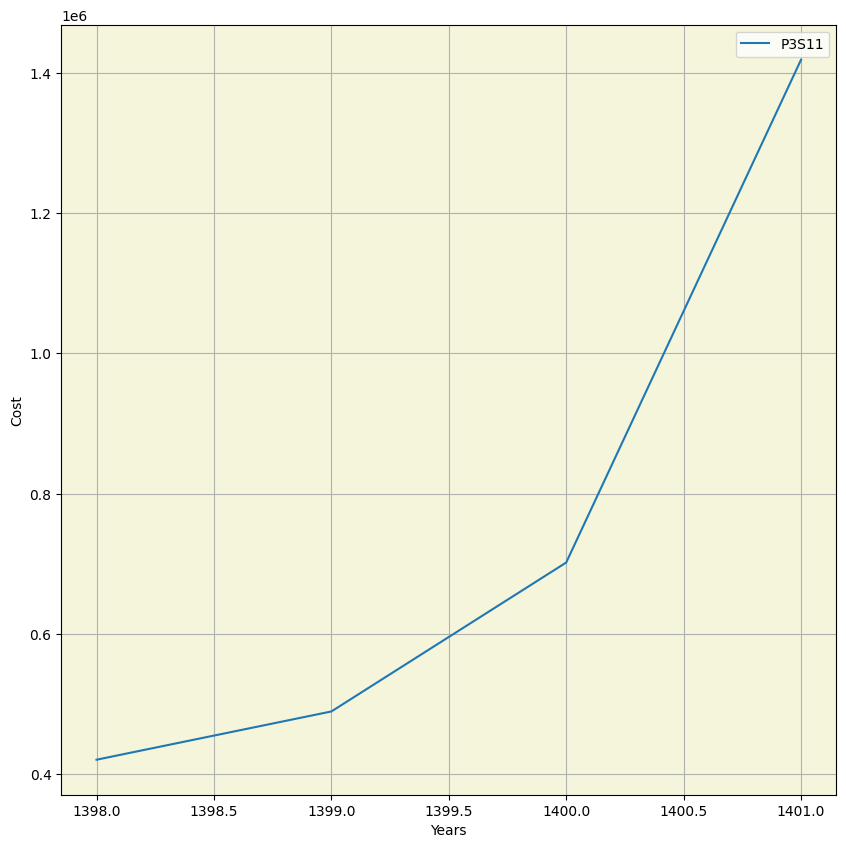

In [ ]:
my_plot('U', ['P3S11'])

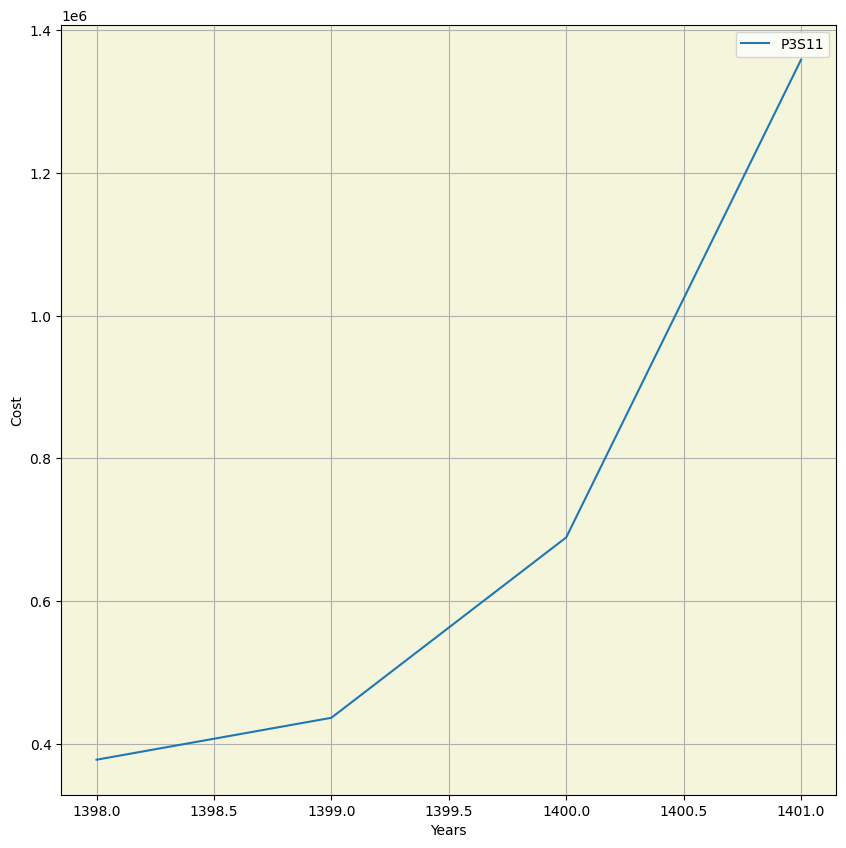

In [ ]:
my_plot('R', ['P3S11'], province=30)

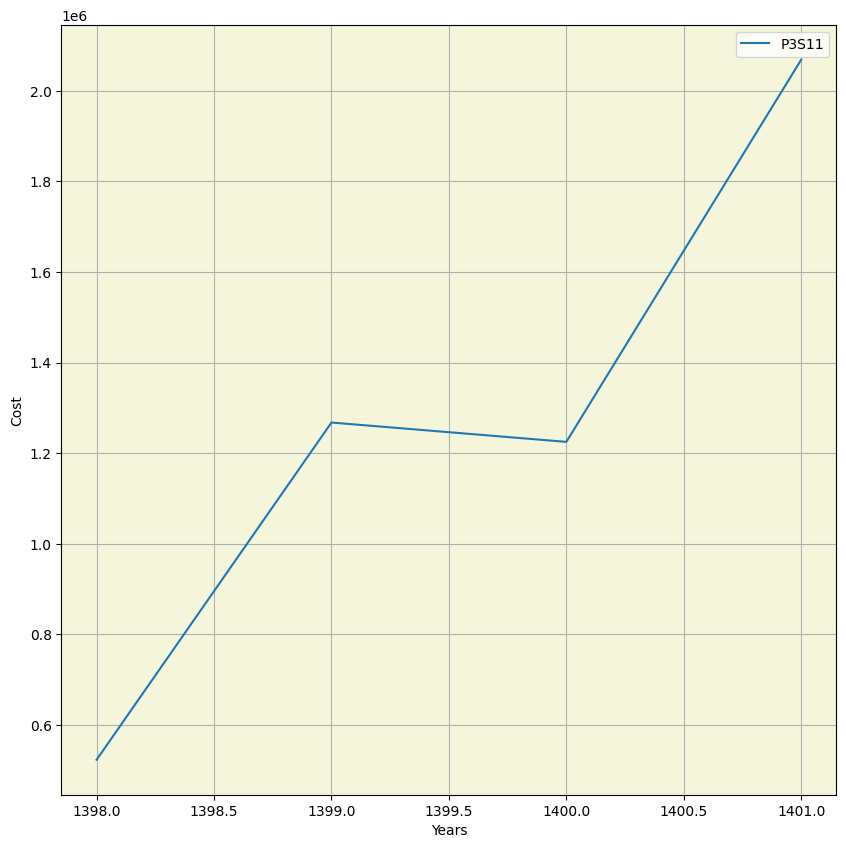

In [ ]:
my_plot('UR', ['P3S11'], province=30)

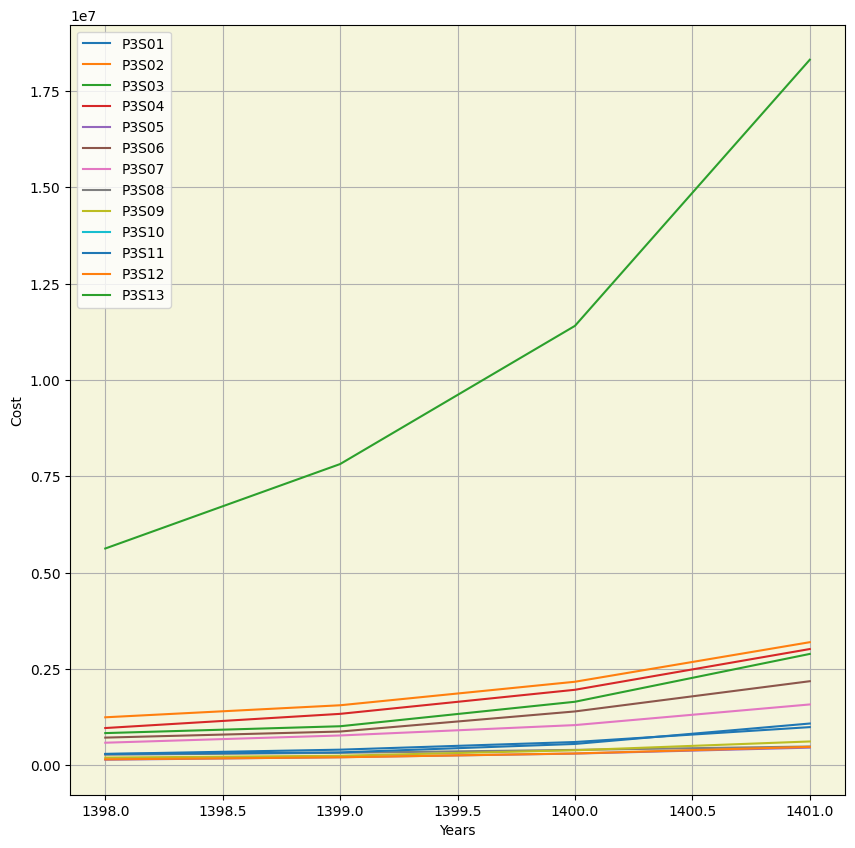

In [ ]:
sheets = [f'P3S{x:02d}' for x in range(1,14)]
my_plot('R', sheets)